In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the csv file into a Pandas DataFrame
df = pd.read_csv('singlephase/2nd_setup_17_peaks_20k_3_ch.csv')

In [3]:
df

,test_id,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,G_01,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G_03,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,G_04,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,G_05,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,G_08,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,O_01,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,O_02,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,O_03,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,O_04,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [4]:
df = df.drop(columns=['test_id'])

In [5]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gas      27 non-null     float64
 1   oil      27 non-null     float64
 2   water    27 non-null     float64
 3   ch1_p1   27 non-null     float64
 4   ch1_p2   27 non-null     float64
 5   ch1_p3   27 non-null     float64
 6   ch1_p4   27 non-null     float64
 7   ch1_p5   27 non-null     float64
 8   ch1_p6   27 non-null     float64
 9   ch1_p7   27 non-null     float64
 10  ch1_p8   27 non-null     float64
 11  ch1_p9   27 non-null     float64
 12  ch1_p10  27 non-null     float64
 13  ch1_p11  27 non-null     float64
 14  ch1_p12  27 non-null     float64
 15  ch1_p13  27 non-null     float64
 16  ch1_p14  27 non-null     float64
 17  ch1_p15  27 non-null     float64
 18  ch1_p16  27 non-null     float64
 19  ch1_p17  27 non-null     float64
 20  ch2_p1   27 non-null     float64
 21  ch2_p2   27 non-nu

In [8]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [9]:
df.isna().sum()

gas        3
oil        3
water      3
ch1_p1     3
ch1_p2     3
ch1_p3     3
ch1_p4     3
ch1_p5     3
ch1_p6     3
ch1_p7     3
ch1_p8     3
ch1_p9     3
ch1_p10    3
ch1_p11    3
ch1_p12    3
ch1_p13    3
ch1_p14    3
ch1_p15    3
ch1_p16    3
ch1_p17    3
ch2_p1     3
ch2_p2     3
ch2_p3     3
ch2_p4     3
ch2_p5     3
ch2_p6     3
ch2_p7     3
ch2_p8     3
ch2_p9     3
ch2_p10    3
ch2_p11    3
ch2_p12    3
ch2_p13    3
ch2_p14    3
ch2_p15    3
ch2_p16    3
ch2_p17    3
ch4_p1     3
ch4_p2     3
ch4_p3     3
ch4_p4     3
ch4_p5     3
ch4_p6     3
ch4_p7     3
ch4_p8     3
ch4_p9     3
ch4_p10    3
ch4_p11    3
ch4_p12    3
ch4_p13    3
ch4_p14    3
ch4_p15    3
ch4_p16    3
ch4_p17    3
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017
10,0.000000,49.706942,0.291781,455.008663,910.020629,7.026051,4635.059897,2277.567011,5235.693133,3415.955776,...,1582.655200,5826.789835,4280.140257,7298.408981,16501.908460,10887.310660,16124.721490,6572.311016,2335.760685,17998.176600


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5]),
 [Text(0.5, 0, 'gas'),
  Text(1.5, 0, 'oil'),
  Text(2.5, 0, 'water'),
  Text(3.5, 0, 'ch1_p1'),
  Text(4.5, 0, 'ch1_p2'),
  Text(5.5, 0, 'ch1_p3'),
  Text(6.5, 0, 'ch1_p4'),
  Text(7.5, 0, 'ch1_p5'),
  Text(8.5, 0, 'ch1_p6'),
  Text(9.5, 0, 'ch1_p7'),
  Text(10.5, 0, 'ch1_p8'),
  Text(11.5, 0, 'ch1_p9'),
  Text(12.5, 0, 'ch1_p10'),
  Text(13.5, 0, 'ch1_p11'),
  Text(14.5, 0, 'ch1_p12'),
  Text(15.5, 0, 'ch1_p13'),
  Text(16.5, 0, 'ch1_p14'),
  Text(17.5, 0, 'ch1_p15'),
  Text(18.5, 0, 'ch1_p16'),
  Text(19.5, 0, 'ch1_p17'),
  Text(20.5, 0, 'ch2_p1'),
  Text(21.5, 0, 'ch2_p2'),
  Text(22.5, 0, 'ch2_p3'),
  Text(23.5, 0, 'ch2_p

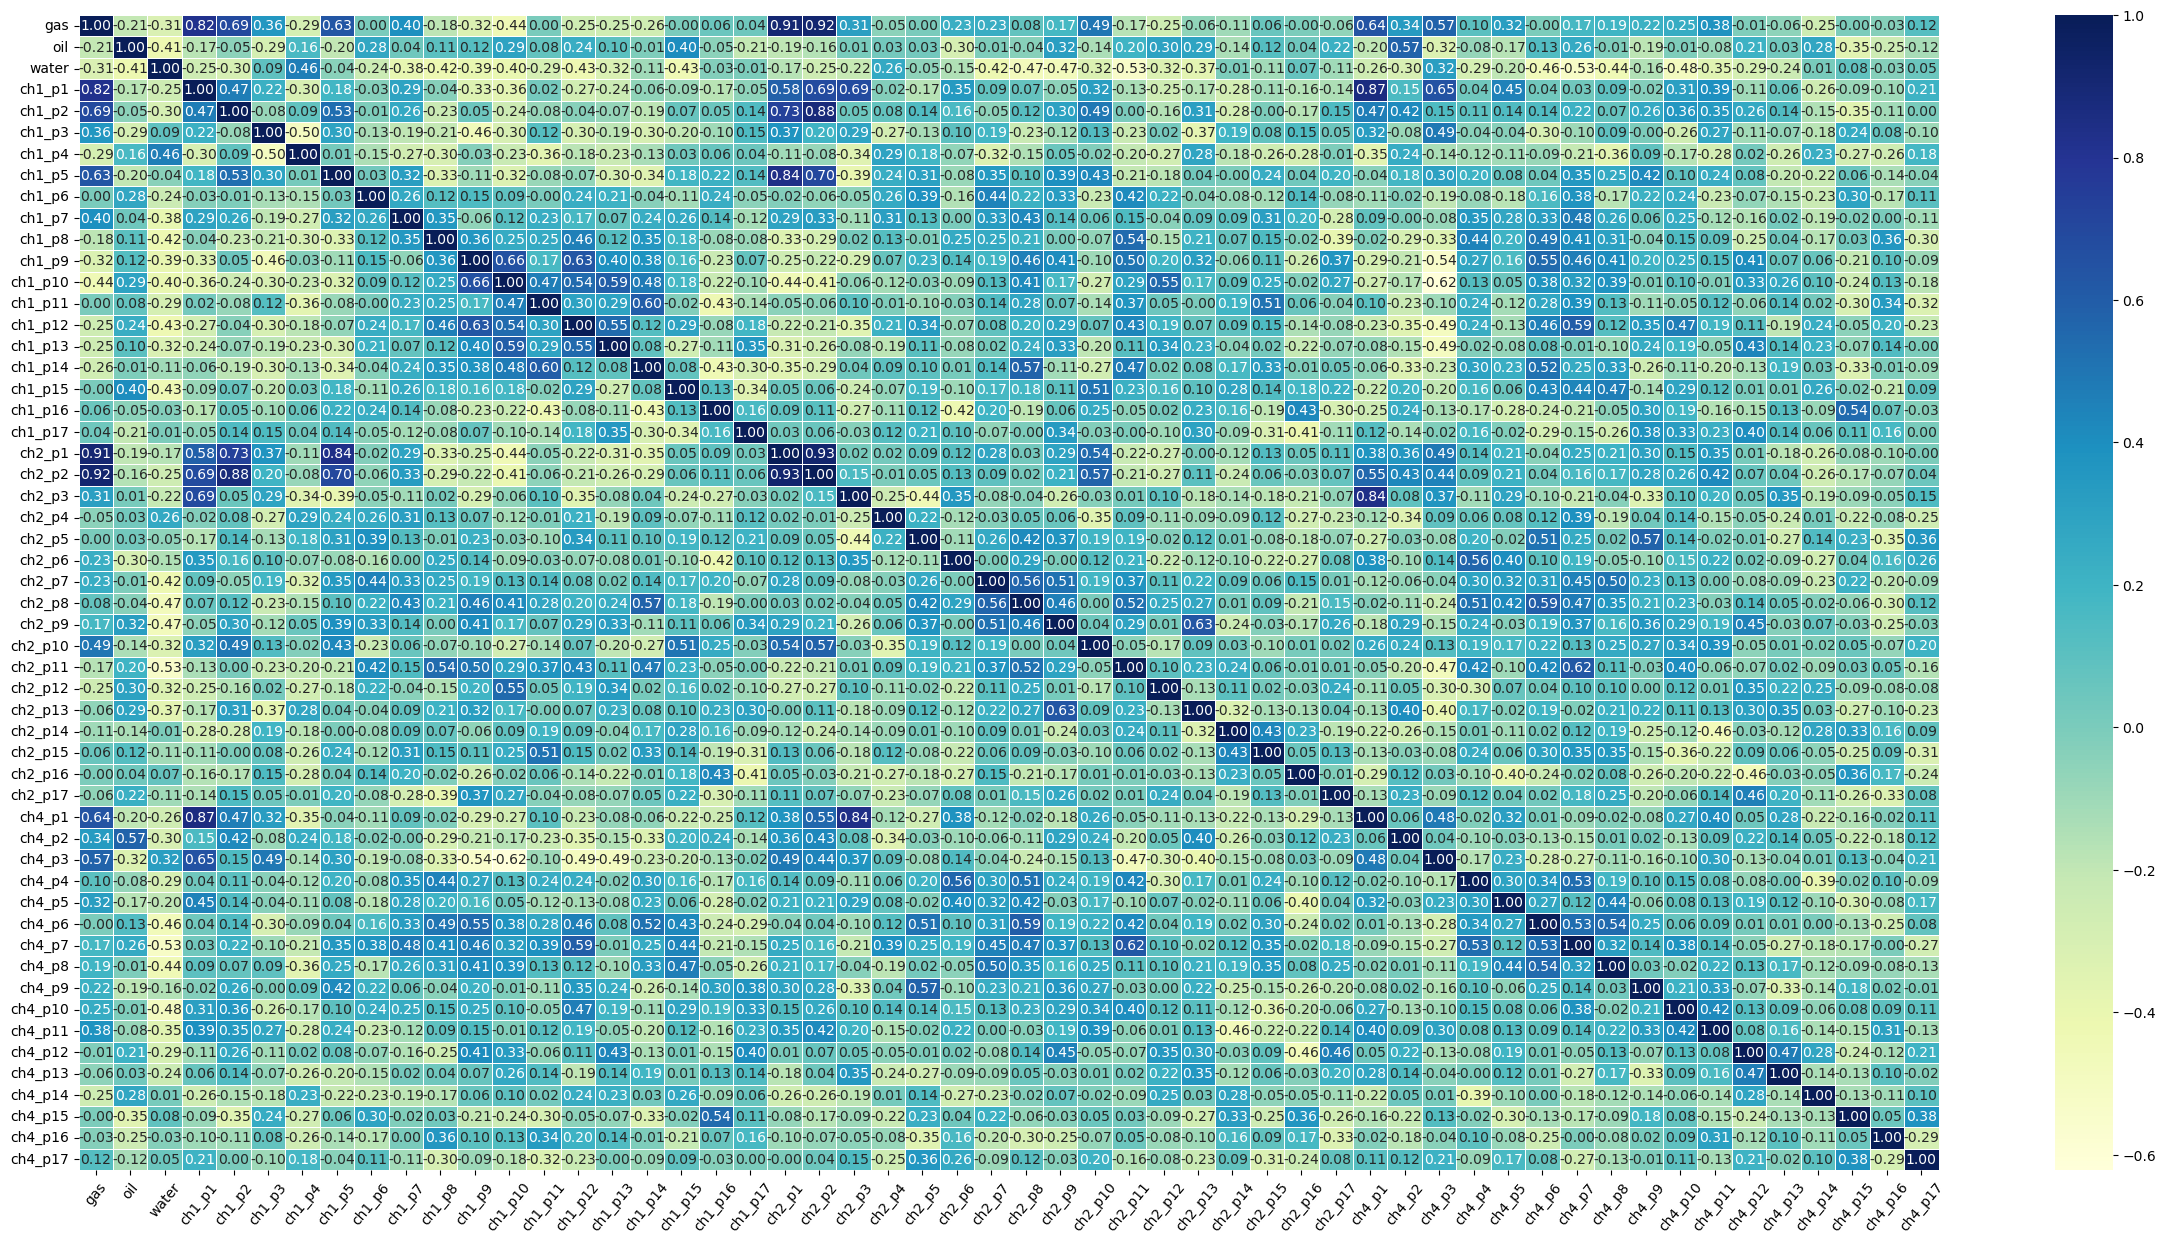

In [12]:
# Correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.xticks(rotation = 50)

In [16]:
df.columns

Index(['gas', 'oil', 'water', 'ch1_p1', 'ch1_p2', 'ch1_p3', 'ch1_p4', 'ch1_p5',
       'ch1_p6', 'ch1_p7', 'ch1_p8', 'ch1_p9', 'ch1_p10', 'ch1_p11', 'ch1_p12',
       'ch1_p13', 'ch1_p14', 'ch1_p15', 'ch1_p16', 'ch1_p17', 'ch2_p1',
       'ch2_p2', 'ch2_p3', 'ch2_p4', 'ch2_p5', 'ch2_p6', 'ch2_p7', 'ch2_p8',
       'ch2_p9', 'ch2_p10', 'ch2_p11', 'ch2_p12', 'ch2_p13', 'ch2_p14',
       'ch2_p15', 'ch2_p16', 'ch2_p17', 'ch4_p1', 'ch4_p2', 'ch4_p3', 'ch4_p4',
       'ch4_p5', 'ch4_p6', 'ch4_p7', 'ch4_p8', 'ch4_p9', 'ch4_p10', 'ch4_p11',
       'ch4_p12', 'ch4_p13', 'ch4_p14', 'ch4_p15', 'ch4_p16', 'ch4_p17'],
      dtype='object')

In [17]:
# Split the data into train, validaiton and test
train, test = train_test_split(df, test_size=0.1, random_state = 1)
train, val = train_test_split(train, test_size=0.05, random_state = 1)

In [18]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('gas')
    y1 = np.array(y1)
    y2 = data.pop('oil')
    y2 = np.array(y2)
    y3 = data.pop('water')
    y3 = np.array(y3)
    return y1, y2, y3

In [19]:
# Get gas, oil and water as the outputs and format them as np arrays
train_stats = train.describe()
train_stats.pop('gas')
train_stats.pop('oil')
train_stats.pop('water')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

print(train_stats)

         count          mean          std          min          25%  \
ch1_p1    22.0    993.210433  1691.243849   443.301881   445.687666   
ch1_p2    22.0   1211.548195  2772.316979     6.956683   169.067867   
ch1_p3    22.0   1118.583721  2091.407822     0.006607     0.028904   
ch1_p4    22.0   2609.438248  1407.678440     7.158182  2276.196980   
ch1_p5    22.0   3849.732533  2197.811278  1728.752141  3412.544326   
ch1_p6    22.0   5078.154422  3225.336434  1226.632269  3852.659379   
ch1_p7    22.0   5247.025595  2871.829040  1325.115903  2544.771670   
ch1_p8    22.0   7341.732543  4442.044467     7.002928  5092.266884   
ch1_p9    22.0   5666.482684  3414.586984  1001.071910  3164.520093   
ch1_p10   22.0   9007.487758  5384.723619  1001.792023  4402.058101   
ch1_p11   22.0   7423.157501  4465.769099  1900.740097  3817.817333   
ch1_p12   22.0   9753.098578  5464.212218  2653.825763  5018.431410   
ch1_p13   22.0   9978.175909  5936.618975  1225.125978  4556.300901   
ch1_p1

In [20]:
# Normalize the training, validation and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [92]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train.columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)

    second_dense_1 = Dense(units='128', activation='relu')(first_dense)
    third_dense_1 = Dense(units='128', activation='relu')(second_dense_1)
    fourth_dense_1 = Dense(units='128', activation='relu')(third_dense_1)
    fifth_dense_1 = Dense(units='128', activation='relu')(fourth_dense_1)
    sixth_dense_1 = Dense(units='128', activation='relu')(fifth_dense_1)
    seventh_dense_1 = Dense(units='128', activation='relu')(sixth_dense_1)
    eight_dense_1 = Dense(units='128', activation='relu')(seventh_dense_1)
    ninth_dense_1 = Dense(units='128', activation='relu')(eight_dense_1)
    # Y1 output will be fed from the ninth dense 1
    y1_output = Dense(units='1', name='gas_output')(ninth_dense_1)

    second_dense_2 = Dense(units='128', activation='relu')(first_dense)
    third_dense_2 = Dense(units='128', activation='relu')(second_dense_2)
    fourth_dense_2 = Dense(units='128', activation='relu')(third_dense_2)
    fifth_dense_2 = Dense(units='128', activation='relu')(fourth_dense_2)
    # Y2 output will be fed from the fifth dense 2
    y2_output = Dense(units='1', name='oil_output')(fifth_dense_2)

    second_dense_3 = Dense(units='128', activation='relu')(first_dense)
    third_dense_3 = Dense(units='128', activation='relu')(second_dense_3)
    # Y3 output will be fed from the third dense 3
    y3_output = Dense(units='1', name='water_output')(third_dense_3)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output])

    return model

In [93]:
model = build_model()

# Specifying the optimizer, and compiling the model with loss functions
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'gas_output': 'mse', 'oil_output': 'mse', 'water_output': 'mse'},
              metrics={'gas_output': tf.keras.metrics.RootMeanSquaredError(),
                       'oil_output': tf.keras.metrics.RootMeanSquaredError(),
                       'water_output': tf.keras.metrics.RootMeanSquaredError()})

In [94]:
history = model.fit(norm_train_X, train_Y,
                    epochs=5,
                    batch_size=2,
                    validation_data=(norm_val_X, val_Y))

Epoch 1/5
11/11 [==============================] - 2s 23ms/step - loss: 4152.2681 - gas_output_loss: 2865.6995 - oil_output_loss: 291.6109 - water_output_loss: 994.9575 - gas_output_root_mean_squared_error: 53.5322 - oil_output_root_mean_squared_error: 17.0766 - water_output_root_mean_squared_error: 31.5429 - val_loss: 9127.3818 - val_gas_output_loss: 7449.8687 - val_oil_output_loss: 6.2300 - val_water_output_loss: 1671.2834 - val_gas_output_root_mean_squared_error: 86.3126 - val_oil_output_root_mean_squared_error: 2.4960 - val_water_output_root_mean_squared_error: 40.8813
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 4001.7720 - gas_output_loss: 2837.7510 - oil_output_loss: 251.1765 - water_output_loss: 912.8447 - gas_output_root_mean_squared_error: 53.2705 - oil_output_root_mean_squared_error: 15.8485 - water_output_root_mean_squared_error: 30.2133 - val_loss: 8323.5020 - val_gas_output_loss: 6714.5806 - val_oil_output_loss: 48.3080 - val_water_output_loss: 1

In [96]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 203ms/step - loss: 2057.7842 - gas_output_loss: 1438.9055 - oil_output_loss: 40.0606 - water_output_loss: 578.8180 - gas_output_root_mean_squared_error: 37.9329 - oil_output_root_mean_squared_error: 6.3293 - water_output_root_mean_squared_error: 24.0586

loss: 2057.7841796875
gas_loss: 1438.905517578125
oil_loss: 40.06064224243164
water_loss: 578.8179931640625
gas_rmse: 37.93290710449219
oil_rmse: 6.329347610473633
water_rmse: 24.058635711669922


In [97]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values - Flow rate [m^3/ℎ]')
    plt.ylabel('Predictions - Flow rate [m^3/ℎ]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show() 


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend()
    plt.show()

In [98]:
dff = pd.read_csv('singlephase/singlephase_custom test_3_ch.csv')
dff = dff.drop(columns=['test_id'])

In [99]:
# formating and adding the seperated dataset for testing
test2_Y = format_output(dff)
norm_test2_X = np.array(norm(dff))

In [100]:
final_test_X = np.concatenate((norm_test_X, norm_test2_X), axis=0)
final_test_X.shape

(6, 51)

In [101]:
norm_test_X.shape, norm_test2_X.shape

((3, 51), (3, 51))

In [102]:
test_Y

(array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([20.00084744,  9.90515844, 39.9906203 ]))

In [103]:
test2_Y

(array([80.95472089,  0.        ,  0.        ]),
 array([0.        , 7.06408224, 0.        ]),
 array([ 0.        ,  0.20832779, 30.00074186]))

In [104]:
final_test_Y = tuple()
for t1, t2 in zip(test_Y, test2_Y):
    final_test_Y += (np.concatenate([t1, t2]),)

print(final_test_Y)

(array([ 0.        ,  0.        ,  0.        , 80.95472089,  0.        ,
        0.        ]), array([0.        , 0.        , 0.        , 0.        , 7.06408224,
       0.        ]), array([20.00084744,  9.90515844, 39.9906203 ,  0.        ,  0.20832779,
       30.00074186]))


1/1 [==============================] - 0s 126ms/step


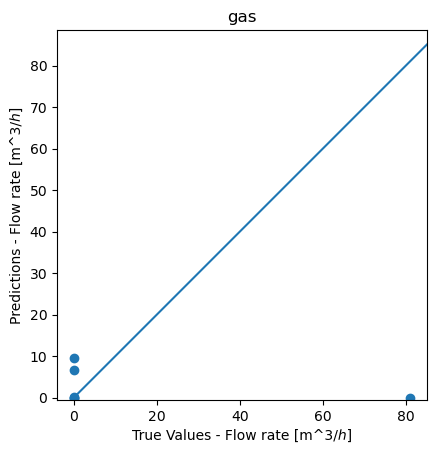

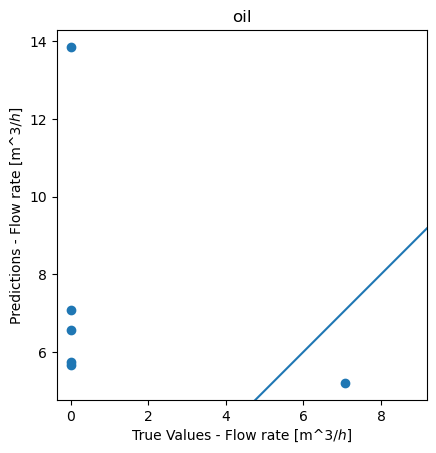

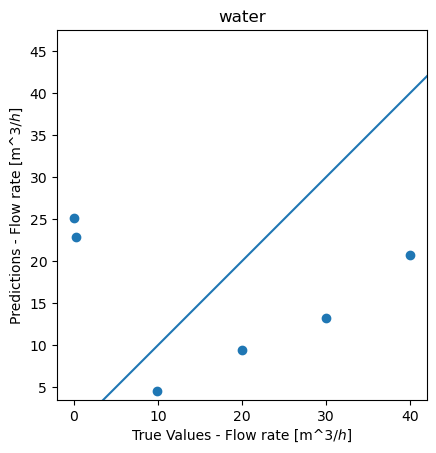

In [105]:
# Run predict
Y_pred = model.predict(final_test_X)
gas_pred = Y_pred[0]
oil_pred = Y_pred[1]
water_pred = Y_pred[2]
plot_diff(final_test_Y[0], Y_pred[0], title='gas')
plot_diff(final_test_Y[1], Y_pred[1], title='oil')
plot_diff(final_test_Y[2], Y_pred[2], title='water')

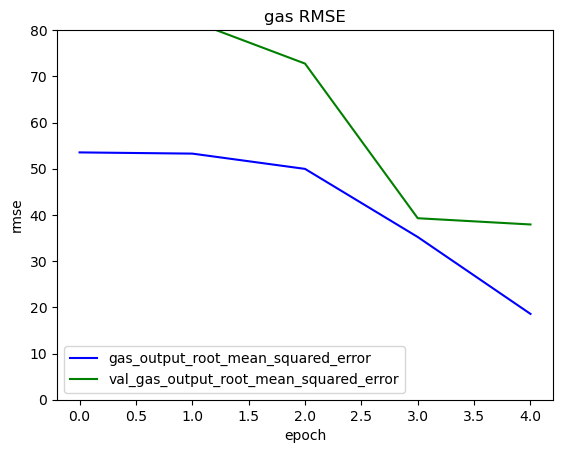

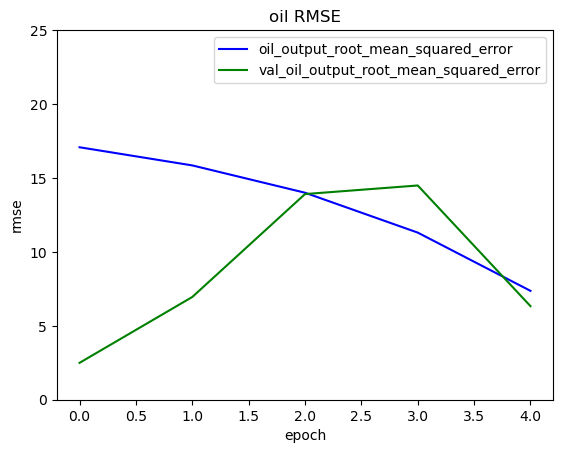

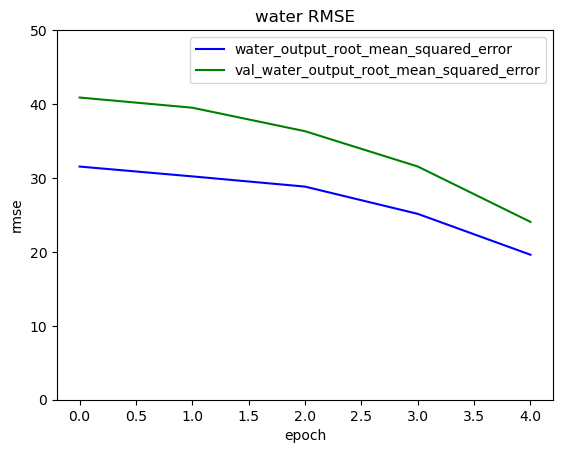

In [106]:
# Plot RMSE
plot_metrics(metric_name='gas_output_root_mean_squared_error', title='gas RMSE', ylim=80)
plot_metrics(metric_name='oil_output_root_mean_squared_error', title='oil RMSE', ylim=25)
plot_metrics(metric_name='water_output_root_mean_squared_error', title='water RMSE', ylim=50)

In [111]:
Y_pred = np.squeeze(Y_pred)

In [112]:
#Create a DataFrame of different parameters for each of the test images
import pandas as pd
pred_df = pd.DataFrame({
                        "gas_true": final_test_Y[0],
                        "gas_preds": Y_pred[0],
                        "oil_true": final_test_Y[1],
                        "oil_preds": Y_pred[1],
                        "water_true": final_test_Y[2],
                        "water_preds": Y_pred[2]})
pred_df

,gas_true,gas_preds,oil_true,oil_preds,water_true,water_preds
0,0.000000,0.004423,0.000000,5.650073,20.000847,9.406149
1,0.000000,6.674983,0.000000,13.859756,9.905158,4.551126
2,0.000000,-0.023904,0.000000,5.740390,39.990620,20.778227
3,80.954721,-0.035510,0.000000,6.566673,0.000000,25.171755
4,0.000000,9.448842,7.064082,5.197495,0.208328,22.911491
5,0.000000,0.219058,0.000000,7.088747,30.000742,13.223365


In [113]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 30ms/step - loss: 1497.9476 - gas_output_loss: 1115.5502 - oil_output_loss: 58.9707 - water_output_loss: 323.4268 - gas_output_root_mean_squared_error: 33.3999 - oil_output_root_mean_squared_error: 7.6792 - water_output_root_mean_squared_error: 17.9841

loss: 1497.9476318359375
gas_loss: 1115.5501708984375
oil_loss: 58.97065353393555
water_loss: 323.4267578125
gas_rmse: 33.39985275268555
oil_rmse: 7.679234981536865
water_rmse: 17.98406982421875


In [114]:
# Save model
model.save('./model_flow_rate_final_single_phase_only_3_ch_/', save_format='tf')

INFO:tensorflow:Assets written to: ./model_flow_rate_final_single_phase_only_3_ch_/assets


INFO:tensorflow:Assets written to: ./model_flow_rate_final_single_phase_only_3_ch_/assets


In [116]:
# # Restore model
loaded_model = tf.keras.models.load_model('./model_flow_rate_final_single_phase_only_3_ch_/')

In [117]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
gas_pred = predictions[0]
oil_pred = predictions[1]
water_pred = predictions[2]

1/1 [==============================] - 0s 102ms/step


In [119]:
pred_df.to_csv('predictions_and_true_single_phase_final_3_ch.csv', index=True)

In [120]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = loaded_model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 191ms/step - loss: 1497.9476 - gas_output_loss: 1115.5502 - oil_output_loss: 58.9707 - water_output_loss: 323.4268 - gas_output_root_mean_squared_error: 33.3999 - oil_output_root_mean_squared_error: 7.6792 - water_output_root_mean_squared_error: 17.9841

loss: 1497.9476318359375
gas_loss: 1115.5501708984375
oil_loss: 58.97065353393555
water_loss: 323.4267578125
gas_rmse: 33.39985275268555
oil_rmse: 7.679234981536865
water_rmse: 17.98406982421875
